### HARDWORK PAYS OFF CHALLENGE

ALGO - LINEAR REGREESION

    1. init theta
    2. error J(theta)
    3. update theta using grad descent
    4. linear regression algo

### SECTION 1 - DATA PREPARATION

    1. download
    2. load
    3. normalise
    4. visualize

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
x = pd.read_csv('./CSV_files/Linear_X_Train.csv')
y = pd.read_csv('./CSV_files/Linear_Y_Train.csv')

In [3]:
print(x.shape, y.shape)

(3750, 1) (3750, 1)


In [4]:
#normalise

u=x.mean()
std = x.std()
x=(x-u)/std

In [5]:
x=x.values
y=y.values

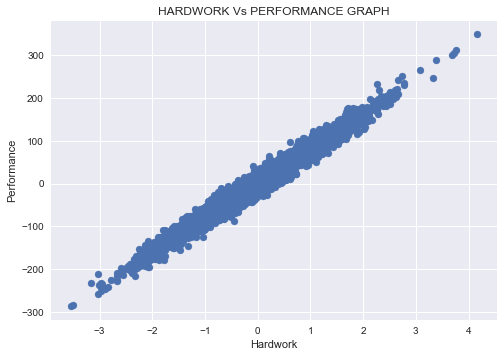

In [6]:
### visualize

plt.style.use('seaborn')
plt.scatter(x,y)
plt.title("HARDWORK Vs PERFORMANCE GRAPH")
plt.ylabel("Performance")
plt.xlabel("Hardwork")
plt.show()

### SECTION 2 - LINEAR REGRESSION

In [22]:
def hypo(x,theta):
    y_ = theta[0]+theta[1]*x
    return y_

def gradient(x,y,theta):
    m=x.shape[0]
    grad=np.zeros((2,))
    for i in range(m):
        y_ = hypo(x[i],theta)
        grad[0] += (y_-y[i])
        grad[1] += (y_ - y[i])*x[i]
    return grad/m

def error(x,y,theta):
    m=x.shape[0]
    total_error =0.0
    for i in range(m):
        y_ = hypo(x[i],theta)
        total_error += (y_ - y[i])**2
    return total_error/m

def gradientDescent(x,y,max_steps=350,lr=0.1):
    theta = np.zeros((2,))
    theta_list = []
    error_list=[]
    grad=np.zeros((2,))
    for i in range(max_steps):
        grad=gradient(x,y,theta)
        e=error(x,y,theta)[0]
        
        theta[0] = theta[0] - lr* grad[0]
        theta[1] = theta[1] - lr*grad[1]
        theta_list.append((theta[0],theta[1]))
        error_list.append(e)
    
    return theta, error_list,theta_list
        
    
        

In [25]:
theta , error_list, theta_list = gradientDescent(x,y)

In [26]:
theta

array([ 0.68386897, 79.91639317])

In [27]:
error_list

[6576.35005246196,
 5363.431583601555,
 4380.909407140931,
 3585.0192858995238,
 2940.3100872006435,
 2418.064692021296,
 1995.0208556117466,
 1652.335043202238,
 1374.7430871924942,
 1149.8802791890744,
 967.7306119219786,
 820.1806387622726,
 700.6580785178313,
 603.8390679719773,
 525.4110223887081,
 461.8805411398847,
 410.4178020432812,
 368.7305133077699,
 334.9618085589583,
 307.60753690921086,
 285.44926394451227,
 267.4999993080805,
 252.96023343814858,
 241.18232521546878,
 231.6416542484914,
 223.9132528397536,
 217.65287675705144,
 212.58167164954133,
 208.4737521088114,
 205.146140112184,
 202.4506146788568,
 200.26710970018584,
 198.49836586533652,
 197.06559846435349,
 195.90498810073353,
 194.96483800015076,
 194.20327129410555,
 193.58636570913785,
 193.08664257557214,
 192.68184285207036,
 192.35393564678145,
 192.0883150718679,
 191.8731496571429,
 191.69885534387893,
 191.55766858449365,
 191.44330053282303,
 191.3506569216234,
 191.27561114991607,
 191.214820472847

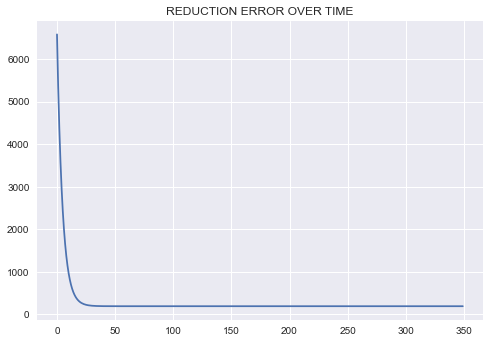

In [28]:
plt.style.use('seaborn')
plt.plot(error_list)
plt.title("REDUCTION ERROR OVER TIME")
plt.show()

### SECTION 3 - PREDICTIONS AND BEST LINE

In [12]:
y_ = hypo(x,theta)

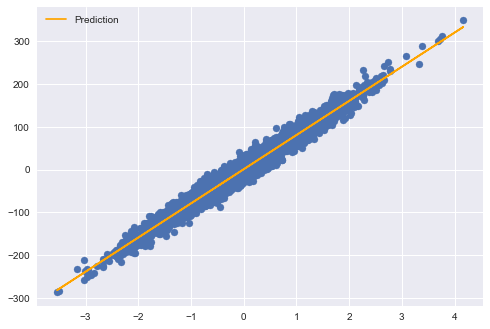

In [13]:
plt.scatter(x,y)
plt.plot(x,y_,color='orange',label='Prediction')
plt.legend()
plt.show()

In [14]:
x_test = pd.read_csv('./CSV_files/Linear_X_Test.csv').values
y_test = hypo(x_test,theta)
y_test.shape
                

(1250, 1)

In [15]:
df = pd.DataFrame ( data = y_test, columns= ['y'])
df.to_csv('y_.csv',index=False)

### SECTION 4 - COMPUTING SCORE

R2 SCORE (R SQUARED) OR COEFF. OF DETERMINATION

    to analyze the accuracy of the predicted test sets

In [16]:
def r2score(y,y_):
    num=np.sum((y-y_)**2)
    denom = np.sum(( y-y.mean())**2)
    score = 1- (num/denom)
    return score*100

In [17]:
r2score(y,y_)

97.09612233822354

### SECTION 5 - VISUALIZING LOSS FUNCTION, GRADIENT DESCENT, THETA UPDATES

In [18]:
#LOSS FUCNTION

In [33]:
t0 = np.arange(-40,40,1)
t1 = np.arange(40,120,1)
to,t1 = np.meshgrid(t0,t1)

J=np.zeros(t0.shape)

for i in range(J.shape[0]):
    for j in range(J.shape[1]):
        y_ = t1[i,j]* x + t0[i,j]
        J[i,j]= np.sum((y-y_)**2)/y.shape[0]

print(J.shape)

IndexError: tuple index out of range

ValueError: Argument Z must be 2-dimensional.

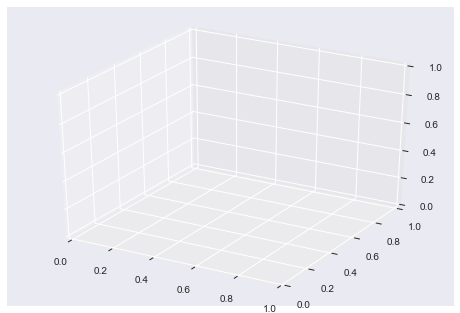

In [20]:
        
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.plot_surface(t0,t1,J,cmap='rainbow')

### plot the changes in values of theta

In [29]:
theta_list = np.array(theta_list)

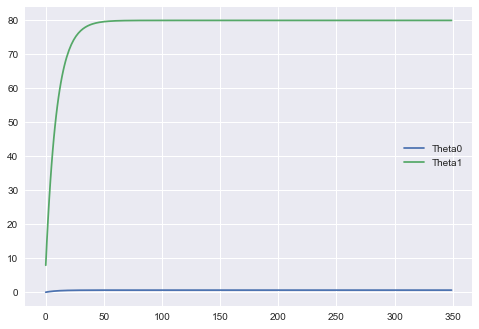

In [31]:
plt.plot(theta_list[:,0],label="Theta0")
plt.plot(theta_list[:,1],label="Theta1")
plt.legend()
plt.show()

### trajectory traced by theta updates in the loss function

ValueError: Argument Z must be 2-dimensional.

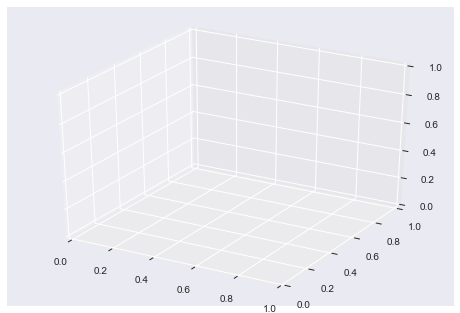

In [32]:
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.plot_surface(to,t1,J,cmap='rainbow')
axes.scatter(theta_list[:,0],theta_list[:,1],error_list)
plt.show()

In [34]:
# 2D contour plt

TypeError: Input z must be 2D, not 1D

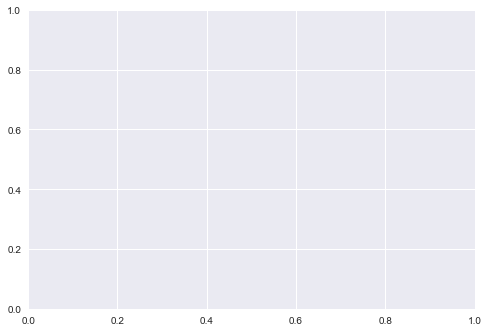

In [35]:
plt.contour(to,t1,J,cmap='rainbow')
plt.scatter(theta_list[:,0],theta_list[:,1])
plt.show()

In [36]:
#save the data in the file

In [37]:
theta_list
np.save("thetaList.npy",theta_list)